# Curation: disable decayed indicators

## Introduction

- UUID: **4676fe7c-6811-4df6-b591-b3f494846a52**
- Started from [issue 30](https://github.com/MISP/misp-playbooks/issues/30)
- State: **Published** : demo version with **output**
- Purpose: This playbook disables **decayed** indicators. It uses a custom decaying model defined in this playbook but can also rely on the MISP build-in models. When an indicator is considered decayed, the `to_ids` flag is set to False and the attribute is tagged.
    - The build-in decaying feature of MISP adds a (decay) score to an indicator but does not automatically disable it. This playbook allows you to do just that.
    - The playbook can exclude or include attributes that are tagged with specific labels.       
    - Use this MISP playbook together with the [**Curate threat events**](https://github.com/MISP/misp-playbooks/blob/main/misp-playbooks/pb_curate_misp_events.ipynb) and [**Query for inconsistencies in MISP events**](https://github.com/MISP/misp-playbooks/blob/main/misp-playbooks/pb_query_for_inconsistencies_misp_events.ipynb) playbook for optimal threat intelligence curation result.
    - The results are summarised at the end of the playbook and shared with **Mattermost**.
- Tags: [ "curation", "workflow", "todo", "qa", "quality", "audit", "decaying", "indicators", "lifecycle"]
- External resources: **Mattermost**
- Target audience: **CTI**

[![](https://mermaid.ink/img/pako:eNqNVE2L2zAQ_SuDIJeQXPYY2O0lUAobujS9lKgkij2ORfURpDElBP_3jmTHSbwfXR-MPH5v5s2TNGdR-BLFQsznc-lIk8EFrL6tX-Bo1Gnv_R_p8q_J5KydpgWcpaiM_1vUKpAU-bsma57VHk1MgUqZiG0L7WQi3QCF5x_SAT-KKOh9Qxg3uc71-3cHiM3-ENSxhqKJ5O3WskADm5deD5RYqBPkaM-otCEMcSMF-a0u4wxIHfg9pAY6HVGKHp4TsOzvpsQAVCsHRldI2uIXKdq7nDCfP3WELoyuHLfBEFijCkWdwT3xphSHf2XYUydv1KbV8XhpMjvyboPbBP1sl7ec7YBh9lekESeCr2Bc-lWi_I_5hQ8BC_oI9cDu5sXjI4XmxtVP25dl3wUuVo4iDx91-yrjW1r_sz0ZtNWu1IUiH2CzzEKGQN9_x2V7ljqqvcE-MPjDe3W3Cz_V4WrCFZVJWfYdYeRebKxVIW3Gjsulm3oJsa7h5u6GtJYTYbA-UqKs0RE4T7pKHWjvuCxMp6sBNJ3u3tadhV0qpfU1sXRiJiyvlS55nJwTm09qjRbTUEjnoVKN4ZEhXctQ1ZBfn1whFumEzERzLBXhUit23YpFHiIzgaVmi1fdiMqTqv0HiD-e-g?type=png)](https://mermaid.live/edit#pako:eNqNVE2L2zAQ_SuDIJeQXPYY2O0lUAobujS9lKgkij2ORfURpDElBP_3jmTHSbwfXR-MPH5v5s2TNGdR-BLFQsznc-lIk8EFrL6tX-Bo1Gnv_R_p8q_J5KydpgWcpaiM_1vUKpAU-bsma57VHk1MgUqZiG0L7WQi3QCF5x_SAT-KKOh9Qxg3uc71-3cHiM3-ENSxhqKJ5O3WskADm5deD5RYqBPkaM-otCEMcSMF-a0u4wxIHfg9pAY6HVGKHp4TsOzvpsQAVCsHRldI2uIXKdq7nDCfP3WELoyuHLfBEFijCkWdwT3xphSHf2XYUydv1KbV8XhpMjvyboPbBP1sl7ec7YBh9lekESeCr2Bc-lWi_I_5hQ8BC_oI9cDu5sXjI4XmxtVP25dl3wUuVo4iDx91-yrjW1r_sz0ZtNWu1IUiH2CzzEKGQN9_x2V7ljqqvcE-MPjDe3W3Cz_V4WrCFZVJWfYdYeRebKxVIW3Gjsulm3oJsa7h5u6GtJYTYbA-UqKs0RE4T7pKHWjvuCxMp6sBNJ3u3tadhV0qpfU1sXRiJiyvlS55nJwTm09qjRbTUEjnoVKN4ZEhXctQ1ZBfn1whFumEzERzLBXhUit23YpFHiIzgaVmi1fdiMqTqv0HiD-e-g)

# Playbook

- **Curate MISP events**
    - Introduction
- **Preparation**
    - PR:1 Initialise environment
    - PR:2 Load helper functions
    - PR:3 Set helper variables
- **Curate events and attributes**
    - RE:1 Introduction
    - RE:2 Limit the search to trusted organisations
    - RE:3 Search for indicators that require curation
    - RE:4 Search with the custom decay model for this playbook
    - RE:5 Search with a MISP decaying model
    - RE:6 Create the summary of findings
    - RE:7 Curation details
- **Closure**
    - EN:1 Create the summary of the playbook 
    - EN:2 Print the summary
    - EN:3 Send a summary to Mattermost
    - EN:4 End of the playbook 
- External references
- Technical details

# Preparation

## PR:1 Initialise environment

This section **initialises the playbook environment** and loads the required Python libraries. 

The credentials for MISP (**API key**) and other services are loaded from the file `keys.py` in the directory **vault**. A [PyMISP](https://github.com/MISP/PyMISP) object is created to interact with MISP and the active MISP server is displayed. By printing out the server name you know that it's possible to connect to MISP. In case of a problem PyMISP will indicate the error with `PyMISPError: Unable to connect to MISP`.

The contents of the `keys.py` file should contain at least :

```
misp_url="<MISP URL>"                  # The URL to our MISP server
misp_key="<MISP API KEY>"              # The MISP API key
misp_verifycert=<True or False>        # Ignore certificate errors
mattermost_playbook_user="<MATTERMOST USER>"
mattermost_hook="<MATTERMOST WEBHOOK>"
```

In [2]:
# Initialise Python environment
import urllib3
import sys
import json
#from pyfaup.faup import Faup
from prettytable import PrettyTable, MARKDOWN
from IPython.display import Image, display, display_markdown, HTML
from datetime import date, datetime
import requests
from pymisp import *
from pymisp.tools import GenericObjectGenerator

import base64
import matplotlib.pyplot as plt
import io

# Load the credentials
sys.path.insert(0, "../vault/")
from keys import *
if misp_verifycert is False:
    import urllib3
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
print("The \033[92mPython libraries\033[90m are loaded and the \033[92mcredentials\033[90m are read from the keys file.")

# Create the PyMISP object
misp = PyMISP(misp_url, misp_key, misp_verifycert)
print("I will use the MISP server \033[92m{}\033[90m for this playbook.\n\n".format(misp_url))

The Python libraries are loaded and the credentials are read from the keys file.
I will use the MISP server https://misp.demo.cudeso.be/ for this playbook.




## PR:2 Load helper functions

The next cell contains **helper functions** that are used in this playbook. 

Instead of distributing helper functions as separate Python files this playbook includes all the required code as one code cell. This makes portability of playbooks between instances easier. The downside is that functions defined in this playbook need to be defined again in other playbooks, which is not optimal for code re-use. For this iteration of playbooks it is chosen to include the code in the playbook (more portability), but you can easily create one "helper" file that contains all the helper code and then import that file in each playbook (for example by adding to the previous cell `from helpers import *`).

In [3]:
def disable_attribute(attribute, decay_model="MISP playbook"):
    # The "published" state is not correctly included in the Attribute search list. Get the event details
    misp_event = MISPEvent()
    misp_event = misp.get_event(attribute.Event.id, pythonify=True)
    publish_state = misp_event.published

    if attribute.Event.uuid not in playbook_results["events"]:
        playbook_results["events"][attribute.Event.uuid] = {"eventid": attribute.Event.id, "eventtitle": attribute.Event.info,
                                                            "eventdate": misp_event.date, "org": misp_event.orgc.name}
        published_text = ""
        if publish_state:
            published_text = "(published)"
        print("   Decayed indicators in event \033[92m{}\033[90m - {} {}".format(attribute.Event.id, attribute.Event.info, published_text))

    tag_list = []
    for tag in playbook_config["curation_decaying_cleanup_tag"]:
        t = MISPTag()
        t.name = tag
        t.local = playbook_config["curation_decaying_cleanup_tag_local"]
        tag_list.append(t)

    attribute.tags = tag_list
    attribute.to_ids = False
    attribute.comment = "Attribute timestamp was {}".format(attribute.timestamp)
    misp.update_attribute(attribute)
    if attribute.uuid not in playbook_results["attributes"]:
        playbook_results["attributes"][attribute.uuid] = {"value": attribute.value, "timestamp": "{}".format(attribute.timestamp),
                                                          "eventid": attribute.Event.id, "eventtitle": attribute.Event.info,
                                                          "decay_model": decay_model}

    if playbook_config["keep_publish_state"]:
        misp_event = misp.get_event(attribute.Event.id, pythonify=True)
        misp_event.published = publish_state
        misp.update_event(misp_event)

    attribute_timestamp = attribute.timestamp.strftime('%Y-%m-%d')
    if attribute_timestamp in playbook_results["timestamps"]:
        playbook_results["timestamps"][attribute_timestamp] += 1
    else:
        playbook_results["timestamps"][attribute_timestamp] = 1

## PR:3 Set helper variables

This cell contains **helper variables** that are used in this playbook. Their usage is explained in the next steps of the playbook.

- `playbook_config` : the configuration of the playbook
- `playbook_results` : the results of the playbook
- `result_limit` : maximum number of results to include in one result page when querying MISP
- `result_limit_max_page` : maximum number of pages to return

In [4]:
playbook_config = {
                    "curation_decaying_model_playbook":
                        {
                            "ip-src": "300d",
                            "ip-src|port": "300d",
                            "ip-dst": "300d",
                            "ip-dst|port": "300d",
                            "hostname": "300d",
                            "hostname|port": "300d",
                            #"domain": "300d",
                            #"domain|ip": "300d",
                            #"url": "400d",
                        },
                    "curation_decaying_model": "curation",
                    "curation_decaying_ignore": ["estimative-language:confidence-in-analytic-judgment=\"high\"", "tlp:red"],
                    "curation_decaying_limit_search": ["tlp:white"],
                    "curation_decaying_publishedstate": None,
                    "curation_decaying_cleanup_tag": ["curation:curated:\"disable_ids_by_cleanup\""],
                    "curation_decaying_cleanup_tag_local": True,

                    "keep_publish_state": True,
                    }

playbook_results = {"events": {},
                    "attributes": {},
                    "decaying_model_meta": {},
                    "timestamps": {}
                    }

result_limit = 5
result_limit_max_page = 3

curation_filter_tags = []
for tag in playbook_config["curation_decaying_ignore"]:
    curation_filter_tags.append("!{}".format(tag))
curation_filter_tags = curation_filter_tags + playbook_config["curation_decaying_limit_search"]

# Curate decayed indicators

## RE:1 Introduction

Among other things, threat information needs to be relevant, **timely**, **valid** and **fresh**. Each community has their own ground rules on how long an indicator is useful, but there are commonalities. For example an IP address belonging to a VPN provider has a relative short lifespan. A domain or URL typically lasts longer and a hash doesn't decay (which doesn't mean it cannot become less useful). These concepts are covered in [indicator lifecycle management](https://kravensecurity.com/what-is-the-indicator-lifecycle/). 

MISP has a build-in scoring system called [decaying of Indicators model](https://www.misp-project.org/2019/09/12/Decaying-Of-Indicators.html/) to guarantee the "freshness" of indicators. You can use the score to omit decayed indicators from being synchronised to your IT environment (use `"excludeDecayed": 1` in your exports). 

![helpers/playbook-decayindicators2.png](helpers/playbook-decayindicators2.png)

There are some drawbacks to the MISP implementation:
- The `to_ids` field remains unchanged, regardless if an indicator is decayed;
- You cannot easily **filter** for only the decayed indicators;
- The scoring (or indication if an indicator is decayed) is only visible after **clicking the decay score tab**.

![helpers/playbook-decayindicators1.png](helpers/playbook-decayindicators1.png)

This playbook addresses some of these drawbacks.
- You can run a custom decaying model from this playbook, a MISP build-in model or your own MISP model;
- The `to_ids` field is disabled for decayed indicators. The comment field includes the original timestamp of the attribute;
- The decayed attributes are tagged

![helpers/playbook-decayindicators3.png](helpers/playbook-decayindicators3.png)

## RE:2 Limit the search to trusted organisations

You can limit the curation to one or more organisations with the variable `org_list`. Optionally you could extend this code to get the list from a *warninglist* holding the **high confidence** organisations. Also see this blog article: [Curate events with an organisation confidence level](https://www.misp-project.org/2022/11/14/curation-with-org-confidence-level.html/).

In [5]:
# Only consider events created by the below organisations. Set to False to include events from all orgs
#org_list = [1, 2, 14, 16]
org_list = False

## RE:3 Search for indicators that require curation

The playbook searches for indicators (MISP attributes) that require curation. The configuration is in `playbook_config`. 

- `curation_decaying_model_playbook` defines the custom decaying model for this playbook, consisting of a dictionary with `misp-attribute-type: xxxd` pairs
    - Replace `misp-attribute-type` with a MISP attribute type (ip-src, ip-dst) and `xxx` with number of days
- `curation_decaying_model`: MISP **indicator decay model** (optionally)
- `curation_decaying_ignore`: **exclude** attributes from decaying
- `curation_decaying_limit_search`: Only include tagged attributes
- `curation_decaying_cleanup_tag`: **Tag** a decayed attribute
- `curation_decaying_cleanup_tag_local`: Use a local tag on decayed attributes
- `curation_decaying_publishedstate`: Filter on published/not published or ignore the published state of events
- `keep_publish_state`: Keep the publish state of events containing decayed attributes

## RE:4 Search with the custom decay model for this playbook

In [6]:
print("Searching for decayed attributes based on custom model. Filter on {}.".format(curation_filter_tags))
processed_attributes = 0

for attribute_type in playbook_config["curation_decaying_model_playbook"]:
    attribute_age = playbook_config["curation_decaying_model_playbook"][attribute_type]
    attribute_timestamp = ["365000d", attribute_age]
    print(" Search \033[92m{}\033[90m older than {}".format(attribute_type, attribute_age))
    current_page = 1
    while True:
        attribute_list = misp.search("attributes", org=org_list, published=playbook_config["curation_decaying_publishedstate"], tags=curation_filter_tags, type_attribute=attribute_type, attribute_timestamp=attribute_timestamp, to_ids=True,
                                         pythonify=True, limit=result_limit, page=current_page)
        len_attribute_list = len(attribute_list)
        if len_attribute_list == 0:
            break

        print("  Page {} with {} results.".format(current_page, len_attribute_list))
        print("  Found \033[92m{}\033[90m decayed indicators".format(len(attribute_list)))
        for attribute in attribute_list:
            processed_attributes += 1
            disable_attribute(attribute)

        current_page += 1
        if current_page >= result_limit_max_page:
            break
print("Finished searching. Processed {} attributes, decayed \033[92m{}\033[90m attributes.".format(processed_attributes, len(playbook_results["attributes"])))

Searching for decayed attributes based on custom model. Filter on ['!estimative-language:confidence-in-analytic-judgment="high"', '!tlp:red', 'tlp:white'].
 Search ip-src older than 300d
  Page 1 with 5 results.
  Found 5 decayed indicators
   Decayed indicators in event 1238 - OSINT SSH Scanning activity by Andrew Morris (published)
  Page 2 with 5 results.
  Found 5 decayed indicators
 Search ip-src|port older than 300d
 Search ip-dst older than 300d
  Page 1 with 5 results.
  Found 5 decayed indicators
   Decayed indicators in event 1201 - OSINT - Operation SMN (Novetta) (published)
  Page 2 with 5 results.
  Found 5 decayed indicators
   Decayed indicators in event 1215 - OSINT Expansion on Additional indicators relating to Sofacy (APT28) phishing blog post by PWC (published)
 Search ip-dst|port older than 300d
  Page 1 with 5 results.
  Found 5 decayed indicators
   Decayed indicators in event 2112 - Emotet 5-18-2018 (published)
  Page 2 with 5 results.
  Found 5 decayed indicator

## RE:5 Search with a MISP decaying model

After searching with the decaying model defined in this playbook (via `playbook_config["curation_decaying_model_playbook"]`) you can also rely on one of the MISP decaying models, either a build-in one or one that defined by you.

The playbook queries the MISP models, and if the one specified in `playbook_config["curation_decaying_model"]` is **found** and **enabled**, then it will apply the decaying actions (disable to_ids and tag the attribute).

You can *skip this step* if you do not want to do decaying based on a MISP decaying model.

In [7]:
###################
# Get all available decaying models
decayingModel = misp._prepare_request('GET', 'decayingModel/index.json').json()
if len(decayingModel) > 0:
    for model in decayingModel:
        if model["DecayingModel"]["name"] == playbook_config["curation_decaying_model"] and model["DecayingModel"]["enabled"] == True:
            playbook_results["decaying_model_meta"] = {"description": model["DecayingModel"]["description"], "lifetime": model["DecayingModel"]["parameters"]["lifetime"], "attributes": []}
            for attr in model["DecayingModelMapping"]:
                playbook_results["decaying_model_meta"]["attributes"].append(attr["attribute_type"])

if len(playbook_results["decaying_model_meta"]["attributes"]) > 0:
    print("Found MISPdecaying model \033[92m{}\033[90m enabled for {}.\n\n".format(playbook_config["curation_decaying_model"], playbook_results["decaying_model_meta"]["attributes"]))
else:
    print("MISP decaying modle \033[91m{}\033[90m not found.\n\n".format(playbook_config["curation_decaying_model"]))

###################
# Apply the model
print("Searching for decayed attributes based on model {} ...".format(playbook_config["curation_decaying_model"]))
current_decayed_indicators = len(playbook_results["attributes"])
processed_attributes = 0
if len(playbook_results["decaying_model_meta"]["attributes"]) > 0:
    current_page = 1
    attribute_type = playbook_results["decaying_model_meta"]["attributes"]
    while True:
        attribute_list = misp.search("attributes", org=org_list, published=playbook_config["curation_decaying_publishedstate"], tags=curation_filter_tags, to_ids=True,
                                     type_attribute=attribute_type, pythonify=True, includeDecayScore=1, limit=result_limit, page=current_page)
        len_attribute_list = len(attribute_list)
        if len_attribute_list == 0:
            break

        print(" Page {} with {} results.".format(current_page, len_attribute_list))
        for attribute in attribute_list:
            decay_indicator = False
            decay_model_match = None
            processed_attributes += 1
            try:
                decay_score = attribute.decay_score
                if len(decay_score) > 0:
                    for model in decay_score:
                        if model["DecayingModel"]["name"] == playbook_config["curation_decaying_model"]:
                            if model["decayed"]:
                                decay_indicator = True
                                break
            except:
                continue

            if decay_indicator:
                disable_attribute(attribute, playbook_config["curation_decaying_model"])

        current_page += 1
        if current_page >= result_limit_max_page:
            break
else:
    print("MISP decaying model \033[91m{}\033[90m not found.".format(playbook_config["curation_decaying_model"]))

print("Finished searching. Processed {} attributes, decayed \033[92m{}\033[90m attributes.".format(processed_attributes, len(playbook_results["attributes"]) - current_decayed_indicators))

Found MISPdecaying model curation enabled for ['domain', 'domain|ip', 'hostname', 'hostname|port', 'ip-dst', 'ip-dst|port', 'ip-src', 'ip-src|port', 'uri', 'url'].


Searching for decayed attributes based on model curation ...
 Page 1 with 5 results.
   Decayed indicators in event 1235 - OSINT I Know You Want Me - Unplugging PlugX from Takahiro Haruyama & Hiroshi Suzuki Black Hat Asia 2014 presentation (published)
 Page 2 with 5 results.
Finished searching. Processed 10 attributes, decayed 10 attributes.


## RE:6 Create the summary of findings

The playbook first creates and then prints out a short summary of the findings. In the next cell the results from `playbook_results` are summarised and put in a table format. This table is then printed in the summary and included in the Mattermost notification.

In [8]:
count_attributes = 0
count_events = 0

table = PrettyTable()
table.field_names = ["Event ID", "Event", "Date", "Org", "Event UUID"]
table.align["Event"] = "l"
table.align["Event ID"] = "l"
table.align["Org"] = "l"
table._max_width = {"Event": 50, "Org": 30}
for entry in playbook_results["events"]:
    count_events += 1
    entry_details = playbook_results["events"][entry]
    table.add_row([entry_details["eventid"], entry_details["eventtitle"], entry_details["eventdate"], entry_details["org"], entry])
misp_events = table
print("Created \033[92m{}\033[90m with {} entries".format("misp_events", count_events))

table = PrettyTable()
table.field_names = ["Attribute value", "Timestamp", "Event ID", "Event", "Model", "Attribute UUID"]
table.align["Event"] = "l"
table.align["Model"] = "l"
table.align["Attribute value"] = "l"
table._max_width = {"Event": 50}
for entry in playbook_results["attributes"]:
    count_attributes += 1
    entry_details = playbook_results["attributes"][entry]
    table.add_row([entry_details["value"], entry_details["timestamp"], entry_details["eventid"], entry_details["eventtitle"], entry_details["decay_model"], entry])
misp_attributes = table
print("Created \033[92m{}\033[90m with {} entries".format("misp_attributes", count_attributes))

Created misp_events with 6 entries
Created misp_attributes with 50 entries


## RE:7 Curation details

Print out the details of the curation changes that happened on **attribute** level. The cell also creates a graph with an overview of the timestamps of the decayed indicators.

Decayed attributes.
+----------------------+---------------------------+----------+----------------------------------------------------+---------------+--------------------------------------+
| Attribute value      |         Timestamp         | Event ID | Event                                              | Model         |            Attribute UUID            |
+----------------------+---------------------------+----------+----------------------------------------------------+---------------+--------------------------------------+
| 0a32f.gameisgood.net | 2014-11-05 13:48:51+00:00 |   1201   | OSINT - Operation SMN (Novetta)                    | MISP playbook | 545a2ac3-2748-4313-b7d3-ee0f950d210b |
| 100100347.3322.org   | 2014-11-05 13:48:51+00:00 |   1201   | OSINT - Operation SMN (Novetta)                    | MISP playbook | 545a2ac3-98b0-42e9-8f07-ee0f950d210b |
| 103.41.124.18        | 2015-02-12 10:03:34+00:00 |   1238   | OSINT SSH Scanning activity by Andrew Morris       | MIS

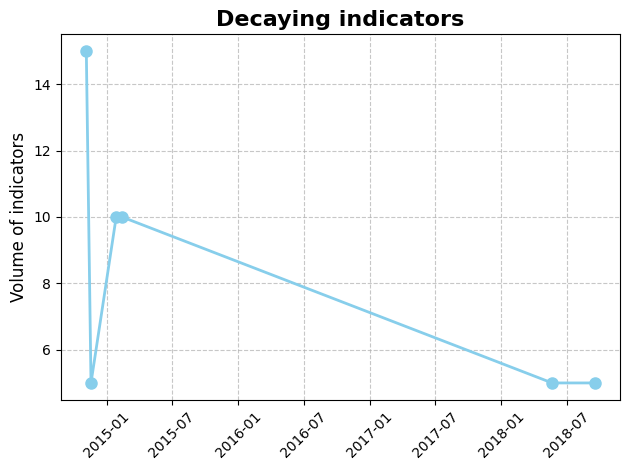

In [9]:
print("Decayed \033[92mattributes\033[90m.")
print(misp_attributes.get_string(sortby="Attribute value"))
print("\n\n\033[92mEvents\033[90m containing decayed attributes.")
print(misp_events.get_string(sortby="Event ID"))

# Create the graph
playbook_results["timestamps"] = dict(sorted(playbook_results["timestamps"].items(), key=lambda item: item[0]))

dates = [datetime.strptime(date, '%Y-%m-%d') for date in playbook_results["timestamps"].keys()]
values = list(playbook_results["timestamps"].values())

plt.plot(dates, values, marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=8)
plt.title('Decaying indicators', fontsize=16, fontweight='bold')
plt.ylabel('Volume of indicators', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
plot_as_string = buffer.getvalue()
plt.show()

# Closure

In this **closure** or end step we create a **summary** of the actions that were performed by the playbook. The summary is printed and can also be send to a chat channel. 

## EN:1 Create the summary of the playbook 

The next section creates a summary and stores the output in the variable `summary` in Markdown format. It also stores an intro text in the variable `intro`. These variables can later be used when sending information to Mattermost or TheHive.

In [10]:
summary = "# MISP Playbook summary\nCuration: disable decayed indicators \n\n"

current_date = datetime.now()
formatted_date = current_date.strftime("%Y-%m-%d")
summary += "## Overview\n\n"
summary += "- Date: **{}**\n".format(formatted_date)
summary += "- Number of **attributes** reviewed: **{}**\n".format(len(playbook_results["attributes"]))
summary += "- Affected **events**: **{}**\n".format(len(playbook_results["events"]))

summary += "\n\n"
summary += "## Decayed attributes\n\n"
misp_attributes.set_style(MARKDOWN)
summary += misp_attributes.get_string(sortby="Attribute value")
summary += "\n\n"

summary += "## Events containing decayed attributes\n\n"
misp_events.set_style(MARKDOWN)
summary += misp_events.get_string(sortby="Event ID")
summary += "\n\n"

raw_attributes = ""
for entry in playbook_results["attributes"]:
    raw_attributes = "{}{}\n".format(raw_attributes, playbook_results["attributes"][entry]["value"])
summary += "\n\n"
summary += "## Raw list of decayed attributes\n\n"
summary += raw_attributes
summary += "\n\n"

print("The \033[92msummary\033[90m of the playbook is available.\n")

The summary of the playbook is available.



## EN:2 Print the summary

In [11]:
print(summary)
# Or print with parsed markdown
#display_markdown(summary, raw=True)

# MISP Playbook summary
Curation: disable decayed indicators 

## Overview

- Date: **2024-03-19**
- Number of **attributes** reviewed: **50**
- Affected **events**: **6**


## Decayed attributes

| Attribute value      |         Timestamp         | Event ID | Event                                              | Model         |            Attribute UUID            |
|:---------------------|:-------------------------:|:--------:|:---------------------------------------------------|:--------------|:------------------------------------:|
| 0a32f.gameisgood.net | 2014-11-05 13:48:51+00:00 |   1201   | OSINT - Operation SMN (Novetta)                    | MISP playbook | 545a2ac3-2748-4313-b7d3-ee0f950d210b |
| 100100347.3322.org   | 2014-11-05 13:48:51+00:00 |   1201   | OSINT - Operation SMN (Novetta)                    | MISP playbook | 545a2ac3-98b0-42e9-8f07-ee0f950d210b |
| 103.41.124.18        | 2015-02-12 10:03:34+00:00 |   1238   | OSINT SSH Scanning activity by Andrew Morris       

## EN:3 Send a summary to Mattermost

Now you can send the summary to Mattermost. You can send the summary in two ways by selecting one of the options for the variable `send_to_mattermost_option` in the next cell.

- The default option where the entire summary is in the **chat**, or
- a short intro and the summary in a **card**

For this playbook we rely on a webhook in Mattermost. You can add a webhook by choosing the gear icon in Mattermost, then choose Integrations and then **Incoming Webhooks**. Set a channel for the webhook and lock the webhook to this channel with *"Lock to this channel"*.

In [12]:
send_to_mattermost_option = "via a chat message"
#send_to_mattermost_option = "via a chat message with card"

In [13]:
buffer_base64 = base64.b64encode(plot_as_string).decode()
data_url = f"data:image/png;base64,{buffer_base64}"
attachment = [{"fallback": "Decaying of indicators","color": "#ff8000","image_url": data_url}]

message = False

if send_to_mattermost_option == "via a chat message":
    message = {"username": mattermost_playbook_user, "text": summary, "attachments": attachment}
elif send_to_mattermost_option == "via a chat message with card":
    message = {"username": mattermost_playbook_user, "text": intro, "props": {"card": summary}, "attachments": attachment}

if message:
    r = requests.post(mattermost_hook, data=json.dumps(message))
    r.raise_for_status()
if message and r.status_code == 200:
    print("Summary is \033[92msent to Mattermost.\n")
else:
    print("\033[91mFailed to sent summary\033[90m to Mattermost.\n")

Summary is sent to Mattermost.



## EN:4 End of the playbook 

In [14]:
print("\033[92m End of the playbook")


 End of the playbook


## External references <a name="extreferences"></a>

- [The MISP Project](https://www.misp-project.org/)
- [Mattermost](https://mattermost.com/)

## Technical details 

### Documentation

This playbook requires these Python **libraries** to exist in the environment where the playbook is executed. You can install them with `pip install <library>`.

```
PrettyTable
ipywidgets
matplotlib
io
```

### Colour codes

The output from Python displays some text in different colours. These are the colour codes

```
Red = '\033[91m'
Green = '\033[92m'
Blue = '\033[94m'
Cyan = '\033[96m'
White = '\033[97m'
Yellow = '\033[93m'
Magenta = '\033[95m'
Grey = '\033[90m'
Black = '\033[90m'
Default = '\033[99m'
```